In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("train.csv")  # Or your dataset name


In [2]:
# ✅ 1. View top 5 rows
print("🔹 Top 5 Rows:")
print(df.head())

🔹 Top 5 Rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN

In [3]:
# ✅ 2. Data Info (columns, datatypes, nulls)
print("\n🔹 Dataset Info:")
print(df.info())


🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [4]:
# ✅ 3. Summary Statistics (numerical columns)
print("\n🔹 Descriptive Statistics:")
print(df.describe())


🔹 Descriptive Statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [6]:
# ✅ 5. Value Counts for Categorical Column (example: 'Sex')
print("\n🔹 Value Counts for 'Sex':")
print(df['Sex'].value_counts())


🔹 Value Counts for 'Sex':
Sex
male      577
female    314
Name: count, dtype: int64


In [7]:
# Checking missing values again
print("🔹 Missing Values Before Cleaning:")
print(df.isnull().sum())


🔹 Missing Values Before Cleaning:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [10]:
df.fillna({'Age': df['Age'].median(), 'Embarked': df['Embarked'].mode()[0]}, inplace=True)

In [11]:
# Handle missing values safely
df.fillna({'Age': df['Age'].median(), 'Embarked': df['Embarked'].mode()[0]}, inplace=True)

# Drop 'Cabin' column if too many missing values
df.drop(columns=['Cabin'], inplace=True)

# Convert datatypes
df['Survived'] = df['Survived'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')

# Optional: Rename columns for clarity
df.rename(columns={'Pclass': 'PassengerClass', 'SibSp': 'SiblingsSpousesAboard'}, inplace=True)


In [12]:
print("\n🔹 Missing Values After Cleaning:")
print(df.isnull().sum())

print("\n🔹 Data Types After Conversion:")
print(df.dtypes)

print("\n🔹 Columns:")
print(df.columns)



🔹 Missing Values After Cleaning:
PassengerId              0
Survived                 0
PassengerClass           0
Name                     0
Sex                      0
Age                      0
SiblingsSpousesAboard    0
Parch                    0
Ticket                   0
Fare                     0
Embarked                 0
dtype: int64

🔹 Data Types After Conversion:
PassengerId                 int64
Survived                 category
PassengerClass           category
Name                       object
Sex                        object
Age                       float64
SiblingsSpousesAboard       int64
Parch                       int64
Ticket                     object
Fare                      float64
Embarked                   object
dtype: object

🔹 Columns:
Index(['PassengerId', 'Survived', 'PassengerClass', 'Name', 'Sex', 'Age',
       'SiblingsSpousesAboard', 'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


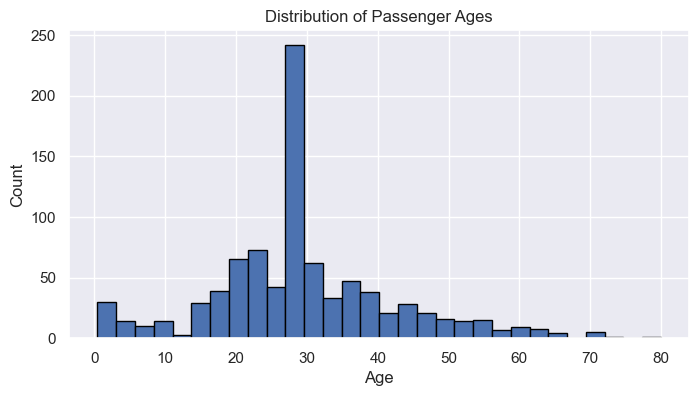

🔎 Observation: Most passengers were between 20 and 40 years old.


In [13]:
# Set seaborn style for better visuals
sns.set(style="darkgrid")

# 1️⃣ Histogram - Age distribution
plt.figure(figsize=(8, 4))
df['Age'].hist(bins=30, edgecolor='black')
plt.title("Distribution of Passenger Ages")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# ✏️ Observation:
print("🔎 Observation: Most passengers were between 20 and 40 years old.")


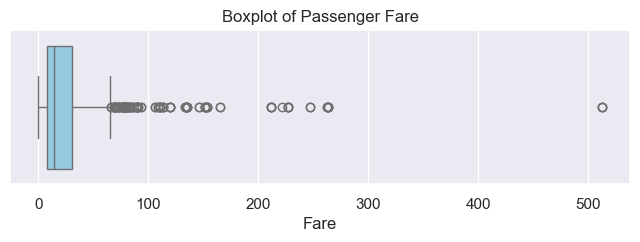

🔎 Observation: Most fares were below 100, with some extreme outliers.


In [14]:
# 2️⃣ Boxplot - Fare
plt.figure(figsize=(8, 2))
sns.boxplot(x=df['Fare'], color='skyblue')
plt.title("Boxplot of Passenger Fare")
plt.xlabel("Fare")
plt.show()

# ✏️ Observation:
print("🔎 Observation: Most fares were below 100, with some extreme outliers.")


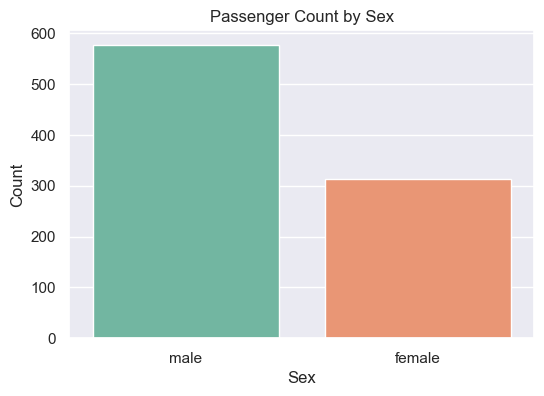

🔎 Observation: There were significantly more male passengers than female.


In [16]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Sex', data=df, palette='Set2', legend=False)
plt.title("Passenger Count by Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

# Observation
print("🔎 Observation: There were significantly more male passengers than female.")


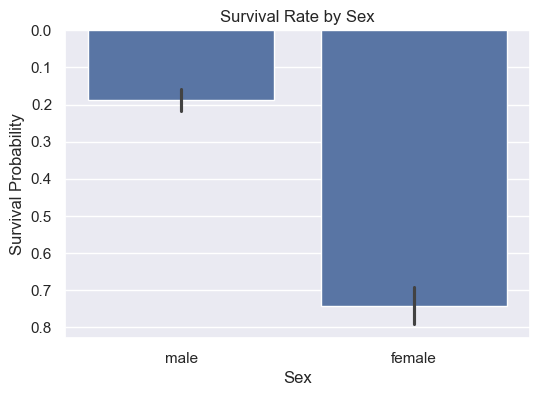

🔎 Observation: Female passengers had a much higher survival rate than male passengers.


In [18]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Survival Rate by Sex")
plt.ylabel("Survival Probability")
plt.show()

# 🔎 Observation:
print("🔎 Observation: Female passengers had a much higher survival rate than male passengers.")


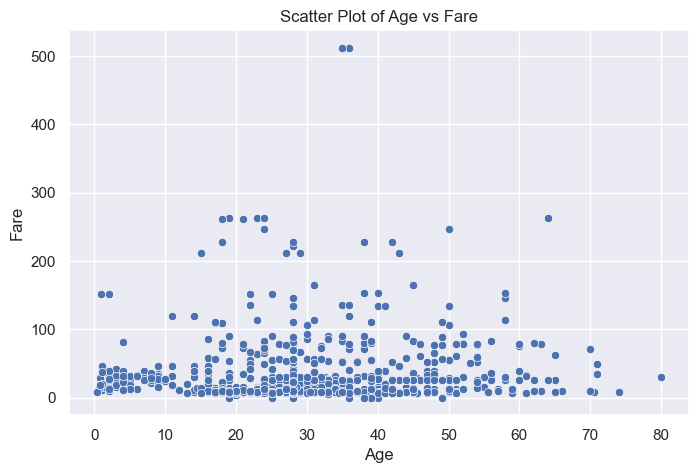

🔎 Observation: Most passengers paid less than 100, and younger passengers are spread across all fare ranges.


In [19]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='Fare', data=df)
plt.title("Scatter Plot of Age vs Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

# 🔎 Observation:
print("🔎 Observation: Most passengers paid less than 100, and younger passengers are spread across all fare ranges.")


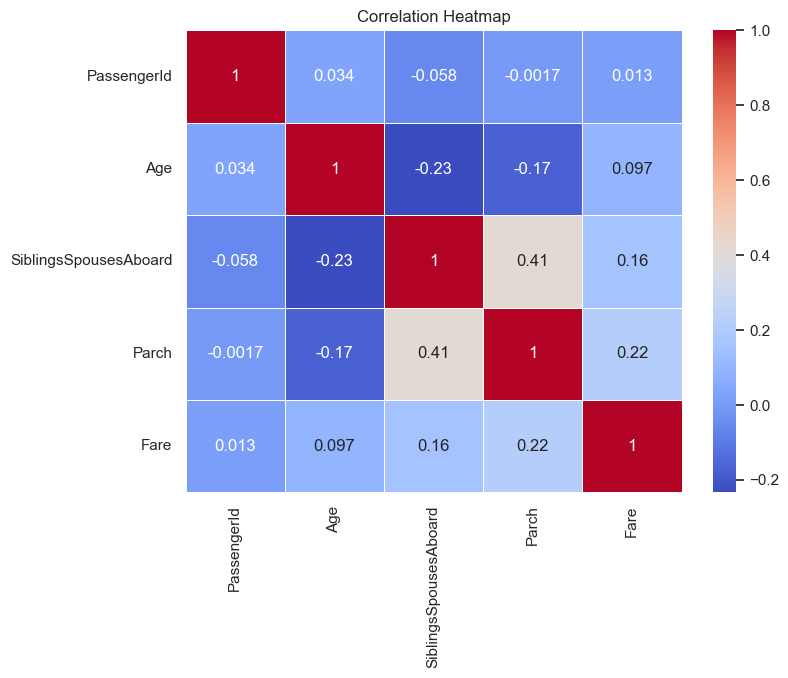

🔎 Observation: Fare and Pclass have a moderate negative correlation. Survived is positively correlated with Fare.


In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# 🔎 Observation:
print("🔎 Observation: Fare and Pclass have a moderate negative correlation. Survived is positively correlated with Fare.")


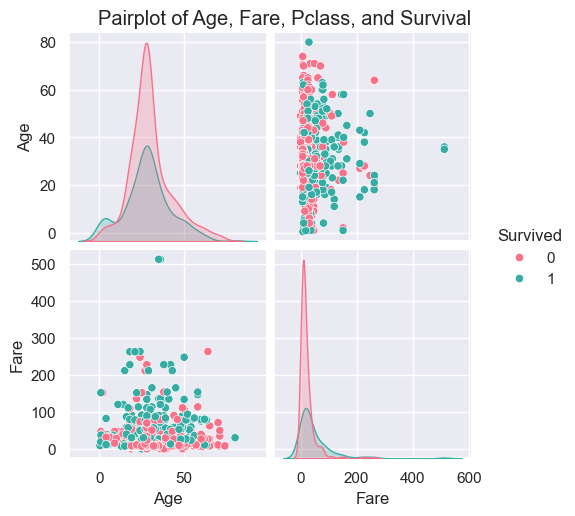

🔎 Observation: Survivors are generally clustered in higher fare and younger age ranges.


In [21]:
sns.pairplot(df[['Age', 'Fare', 'PassengerClass', 'Survived']], hue='Survived', palette='husl')
plt.suptitle("Pairplot of Age, Fare, Pclass, and Survival", y=1.02)
plt.show()

# 🔎 Observation:
print("🔎 Observation: Survivors are generally clustered in higher fare and younger age ranges.")


C:\Users\91743\AppData\Local\Temp\ipykernel_18248\2779006466.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Survived', y='Age', data=df, palette='Set3')


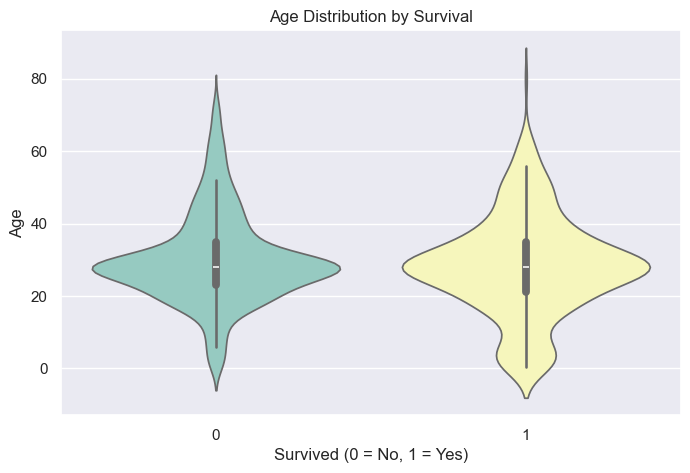

🔎 Observation: Survivors tend to be slightly younger on average, with a tighter age distribution.


In [22]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='Survived', y='Age', data=df, palette='Set3')
plt.title("Age Distribution by Survival")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.show()

# 🔎 Observation:
print("🔎 Observation: Survivors tend to be slightly younger on average, with a tighter age distribution.")


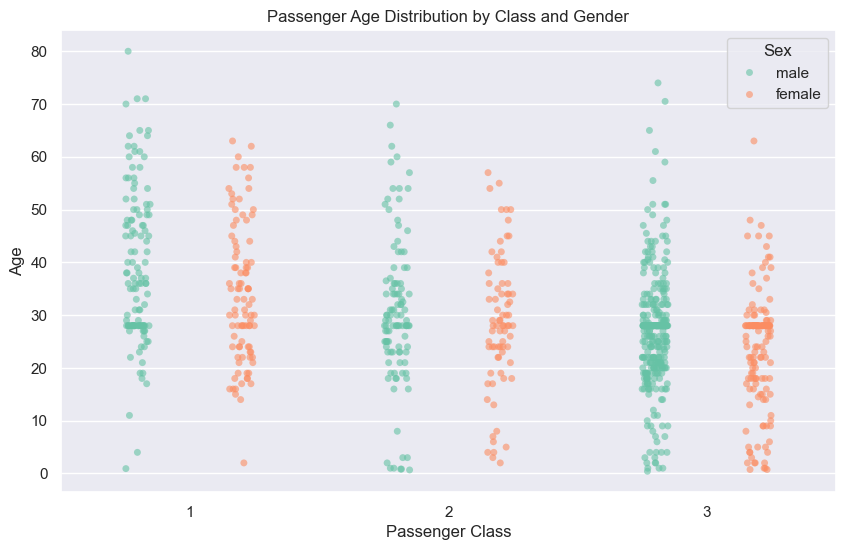

In [28]:
plt.figure(figsize=(10, 6))
sns.stripplot(x='PassengerClass', y='Age', hue='Sex', data=df, palette='Set2', dodge=True, alpha=0.6)
plt.title("Passenger Age Distribution by Class and Gender")
plt.xlabel("Passenger Class")
plt.ylabel("Age")
plt.legend(title='Sex')
plt.show()


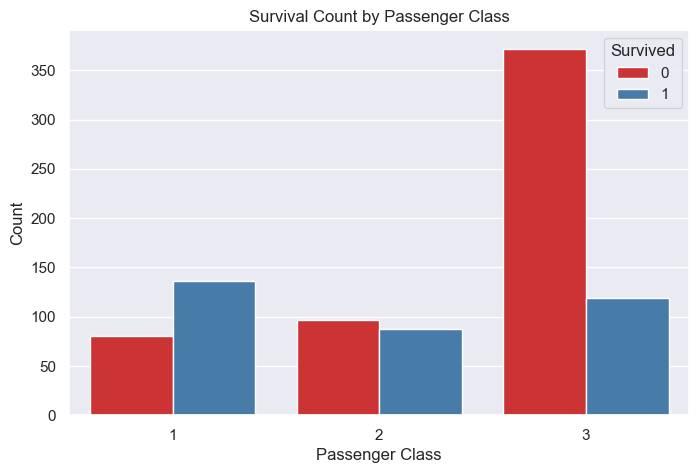

🔎 Observation: 1st class passengers had higher survival counts, especially compared to 3rd class.


C:\Users\91743\AppData\Local\Temp\ipykernel_18248\1640801856.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='PassengerClass', y='Fare', data=df, palette='coolwarm')


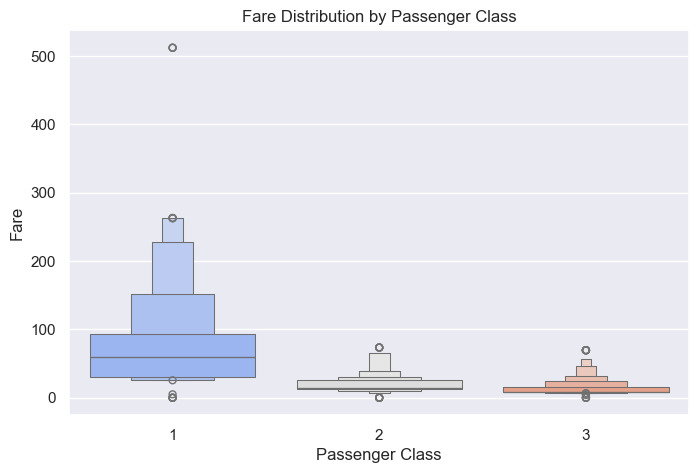

🔎 Observation: Higher classes (1st class) paid significantly more, with more variability in fare.


In [29]:
plt.figure(figsize=(8, 5))
sns.boxenplot(x='PassengerClass', y='Fare', data=df, palette='coolwarm')
plt.title("Fare Distribution by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Fare")
plt.show()

# 🔎 Observation:
print("🔎 Observation: Higher classes (1st class) paid significantly more, with more variability in fare.")


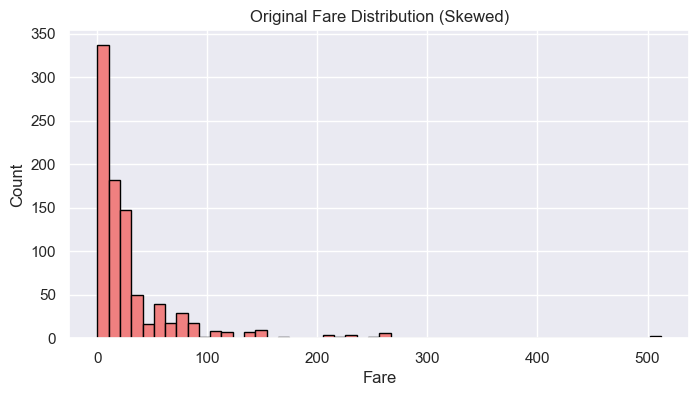

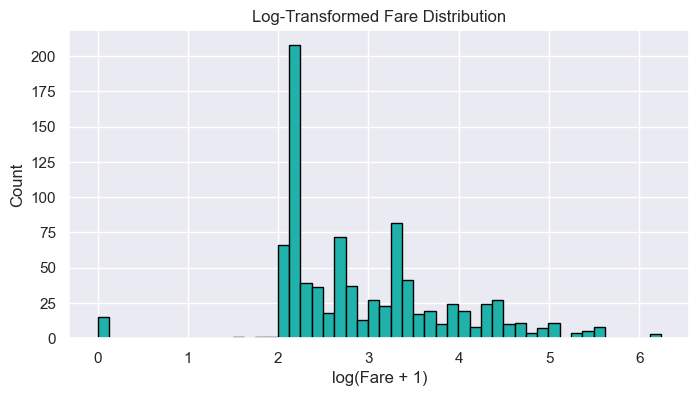

🔎 Observation: Log transformation reduced the right skew in Fare values, making the distribution more symmetric.


In [34]:
import numpy as np

# Log transformation to reduce skewness
df['Fare_log'] = np.log1p(df['Fare'])  # log1p handles 0 values safely

# Histogram Before Log Transform##
plt.figure(figsize=(8, 4))
df['Fare'].hist(bins=50, color='lightcoral', edgecolor='black')
plt.title("Original Fare Distribution (Skewed)")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()

# Histogram After Log Transform##
plt.figure(figsize=(8, 4))
df['Fare_log'].hist(bins=50, color='lightseagreen', edgecolor='black')
plt.title("Log-Transformed Fare Distribution")
plt.xlabel("log(Fare + 1)")
plt.ylabel("Count")
plt.show()

print("🔎 Observation: Log transformation reduced the right skew in Fare values, making the distribution more symmetric.")



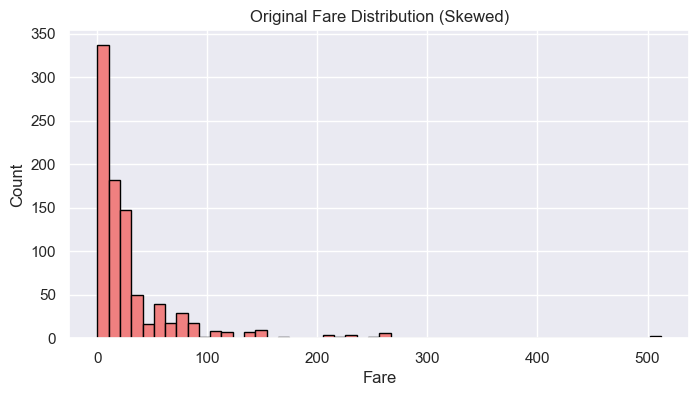

In [31]:
# Histogram Before Log Transform##
plt.figure(figsize=(8, 4))
df['Fare'].hist(bins=50, color='lightcoral', edgecolor='black')
plt.title("Original Fare Distribution (Skewed)")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()


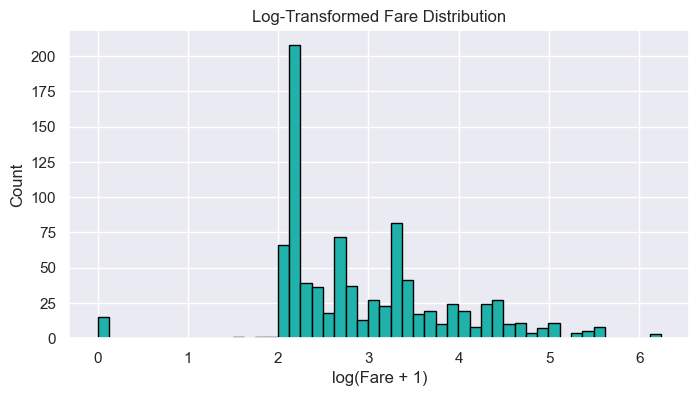

In [32]:
##Histogram After Log Transform##
plt.figure(figsize=(8, 4))
df['Fare_log'].hist(bins=50, color='lightseagreen', edgecolor='black')
plt.title("Log-Transformed Fare Distribution")
plt.xlabel("log(Fare + 1)")
plt.ylabel("Count")
plt.show()


In [33]:
print("🔎 Observation: Log transformation reduced the right skew in Fare values, making the distribution more symmetric.")


🔎 Observation: Log transformation reduced the right skew in Fare values, making the distribution more symmetric.


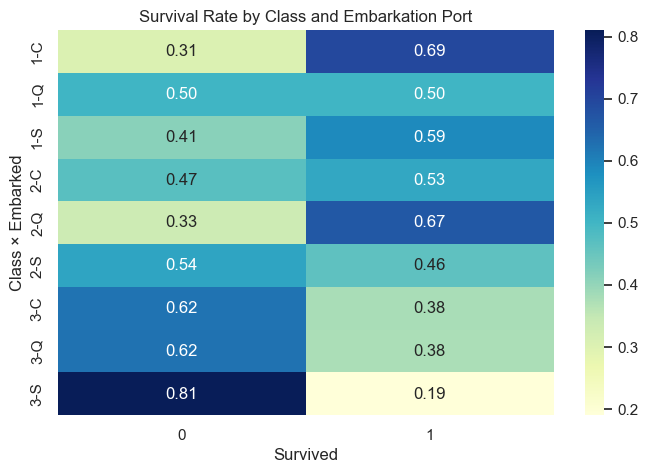

In [37]:
# Create a crosstab: Survival rate by Class and Embarkation Port
crosstab = pd.crosstab([df['PassengerClass'], df['Embarked']], df['Survived'], normalize='index')

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(crosstab, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Survival Rate by Class and Embarkation Port")
plt.ylabel("Class × Embarked")
plt.xlabel("Survived")
plt.show()


Embarked               C         Q         S
PassengerClass                              
1               0.694118  0.500000  0.589147
2               0.529412  0.666667  0.463415
3               0.378788  0.375000  0.189802


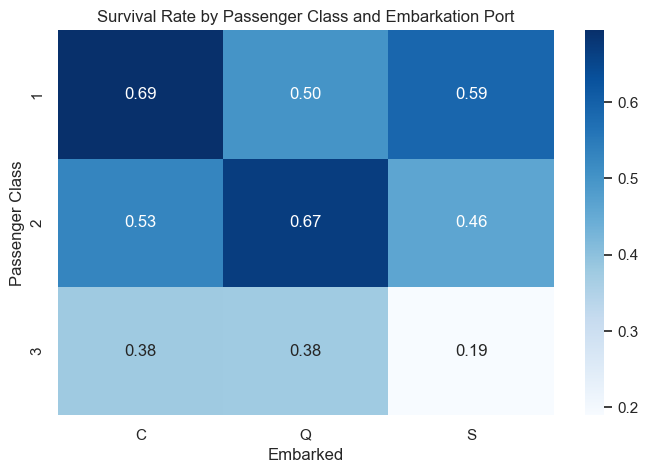

In [40]:
# Survival rate by Passenger Class and Embarked
group_summary = df.groupby(['PassengerClass', 'Embarked'], observed=True)['Survived'].mean().unstack()

# Display the summary
print(group_summary)

plt.figure(figsize=(8, 5))
sns.heatmap(group_summary, annot=True, fmt=".2f", cmap='Blues')
plt.title("Survival Rate by Passenger Class and Embarkation Port")
plt.xlabel("Embarked")
plt.ylabel("Passenger Class")
plt.show()
